**(1) Importación de paquetes**

In [109]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

**(2) Descarga de información**

In [110]:
df = pd.read_csv('C:\\Users\\Usuario\\Desktop\\ciencia_de_datos\\reto_python_2025\\empleados.csv', delimiter=';')
df.head()

,Nombre,Apellido,Sexo,Estado_Civil,Edad,Experiencia,Salario,Gerencia,Departamento
0,Alexandro,NaN,Masculino,Soltero(a),22.0,3.0,2423.0,No,Publicidad
1,Carlos,NaN,Masculino,Casado(a),38.0,10.0,3132.0,Sí,NaN
2,Felipa,NaN,Femenino,Soltero(a),26.0,5.0,2639.0,No,Comercial
3,Daniel,NaN,Masculino,Casado(a),35.0,10.0,3122.0,No,Comercial
4,John,NaN,Masculino,Casado(a),35.0,13.0,3431.0,Sí,Servicios al cliente


**(3) Tratamiento de la información**

In [111]:
# Información general del dataframe:

print(f'Cantidad de filas: {df.shape[0]}')
print(f'Cantidad de columnas: {df.shape[1]}')
print('Cantidad de valores nulos: ')
print(df.isnull().sum())

Cantidad de filas: 251
Cantidad de columnas: 9
Cantidad de valores nulos: 
Nombre            6
Apellido        251
Sexo             37
Estado_Civil      4
Edad             61
Experiencia       4
Salario           6
Gerencia         21
Departamento     12
dtype: int64


In [112]:
# Eliminar datos nulos (null values):

# Nota importante: recordar que la columna "Apellido" no tiene registros, es decir, todos son null values

df = df.drop(columns=['Apellido'])
df = df.dropna(axis=0)

print(f'Cantidad de filas: {df.shape[0]}')
print(f'Cantidad de columnas: {df.shape[1]}')
print('Cantidad de valores nulos: ')
print(df.isnull().sum())

Cantidad de filas: 145
Cantidad de columnas: 8
Cantidad de valores nulos: 
Nombre          0
Sexo            0
Estado_Civil    0
Edad            0
Experiencia     0
Salario         0
Gerencia        0
Departamento    0
dtype: int64


**(4) Calculo del coeficiente de correlación**

In [113]:
# Se necesita conocer la correlación entre los campos "Experiencia" y "Salario"

df['Experiencia'].corr(df['Salario'])

np.float64(0.9921960458660798)

<Axes: >

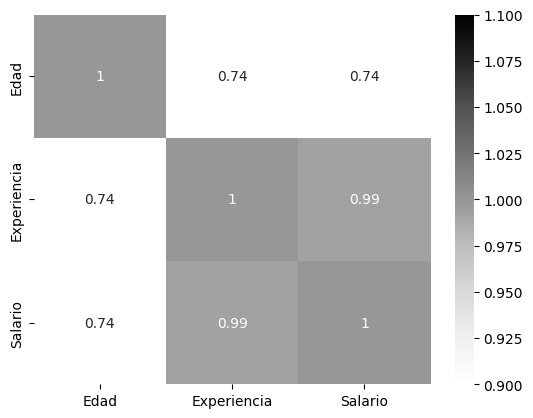

In [114]:
# Creación del "Heatmap" para el dataframe:

sns.heatmap(df.corr(numeric_only=True), vmin=1, annot=True, cmap='Greys')

**(5) Operaciones con campos numéricos**

In [115]:
# Media o promedio:

df_num = df.select_dtypes(include='number')

medias = df_num.mean(axis=0)
medias

Edad             33.868966
Experiencia       6.896552
Salario        2781.889655
dtype: float64

In [116]:
# Valores mínimos:

minimos = df_num.min()
minimos

Edad             18.0
Experiencia       0.0
Salario        1872.0
dtype: float64

In [117]:
# Valores máximos:

maximos = df_num.max()
maximos

Edad             71.0
Experiencia      33.0
Salario        5462.0
dtype: float64

In [118]:
# Desviación estándar:

desv_est = df_num.std()
desv_est

Edad            12.422680
Experiencia      6.576182
Salario        711.535245
dtype: float64

In [119]:
# Coeficiente de variación:

coef_var = desv_est / medias
coef_var

Edad           0.366787
Experiencia    0.953546
Salario        0.255774
dtype: float64

**(6) Normalización de las columnas**

In [120]:
# Creación del modelo de escala:

scaler = MinMaxScaler()

In [121]:
df_scaled = scaler.fit_transform(df_num) # Genera un array o arreglo de datos
df_scaled = pd.DataFrame(df_scaled, columns=['Edad', 'Experiencia', 'Salario'])
df_scaled.head()

# Nota importante: se ha creado el dataframe "df_scaled" (de uso para este apartado específico)

,Edad,Experiencia,Salario
0,0.075472,0.090909,0.153482
1,0.150943,0.151515,0.213649
2,0.320755,0.303030,0.348189
3,0.320755,0.393939,0.434262
4,0.679245,0.545455,0.582173


**(7) Agregar registros a un dataframe**

In [122]:
# Recordemos que el dataframe "df" tiene un total de 145 registros, siendo los últimos 5:

df.tail()

,Nombre,Sexo,Estado_Civil,Edad,Experiencia,Salario,Gerencia,Departamento
244,Hernando,Masculino,Divorciado(a),29.0,4.0,2510.0,No,IT
245,Vito,Masculino,Divorciado(a),22.0,4.0,2530.0,No,Producto
246,Jose,Masculino,Casado(a),30.0,6.0,2760.0,No,Servicios al cliente
247,Marcelo,Masculino,Divorciado(a),44.0,15.0,3616.0,No,IT
250,Leandro,Masculino,Casado(a),37.0,11.0,3245.0,No,Finanzas


In [123]:
# Nuevo registro:

nuevo_registro = pd.DataFrame.from_dict([{
    'Nombre':'Noemi',
    'Sexo':'Femenino',
    'Estado_Civil':'Casado(a)',
    'Edad':33,
    'Experiencia':10.0,
    'Salario':2750,
    'Gerencia':'No',
    'Departamento':'Marketing'
}])
df = pd.concat([df, nuevo_registro], ignore_index=True)

df.tail()

,Nombre,Sexo,Estado_Civil,Edad,Experiencia,Salario,Gerencia,Departamento
141,Vito,Masculino,Divorciado(a),22.0,4.0,2530.0,No,Producto
142,Jose,Masculino,Casado(a),30.0,6.0,2760.0,No,Servicios al cliente
143,Marcelo,Masculino,Divorciado(a),44.0,15.0,3616.0,No,IT
144,Leandro,Masculino,Casado(a),37.0,11.0,3245.0,No,Finanzas
145,Noemi,Femenino,Casado(a),33.0,10.0,2750.0,No,Marketing


In [124]:
print(f'Cantidad de filas: {df.shape[0]}')
print(f'Cantidad de columnas: {df.shape[1]}')

Cantidad de filas: 146
Cantidad de columnas: 8


**(8) Eliminar encabezados y convertir datos a flotantes**

In [125]:
emisiones = np.array(
[['Motor', 'Cilindros', 'Consumo Ciudad', 'Consumo Carretera', 'CO2'],
[2,4,13.7,9.4,382],
[4.3,4,14.3,9,347],
[4,4,9.5,8.5,327],
[4.4,6,18.4,7.1,377],
[2.7,6,13.7,9.3,294],
[3.1,6,19.4,6.4,297],
[4,4,9.6,13.3,313],
[1.8,6,11.5,18,207],
[6.3,4,11.6,9.6,253],
[5,6,11.3,9.7,269],
[2.8,8,13.1,10,235],
[2.2,8,13.2,10.6,235],
[2.8,8,13.3,6.9,307],
[4,8,11.9,6.7,354],
[4,8,12.9,5.7,337],
[3.9,8,12.6,5.8,368],
[3.8,6,13.1,6.1,327],
[4,6,12.8,5.9,205],
[5,6,13.3,6.5,193],
[6.7,6,19.7,6.1,207],
[4,6,16.7,5.9,209],
[2.9,8,19.7,8.4,200],
[2.7,8,16.7,8.3,193],
[3.1,4,10,9.6,235],
[3.6,4,11.5,10.2,239],
[3.9,4,9.3,11.2,230],
[2.1,4,12.2,7.2,278]])

In [126]:
# Eliminamos los encabezados:

emisiones = np.delete(emisiones, 0, axis=0)
emisiones

array([['2', '4', '13.7', '9.4', '382'],
       ['4.3', '4', '14.3', '9', '347'],
       ['4', '4', '9.5', '8.5', '327'],
       ['4.4', '6', '18.4', '7.1', '377'],
       ['2.7', '6', '13.7', '9.3', '294'],
       ['3.1', '6', '19.4', '6.4', '297'],
       ['4', '4', '9.6', '13.3', '313'],
       ['1.8', '6', '11.5', '18', '207'],
       ['6.3', '4', '11.6', '9.6', '253'],
       ['5', '6', '11.3', '9.7', '269'],
       ['2.8', '8', '13.1', '10', '235'],
       ['2.2', '8', '13.2', '10.6', '235'],
       ['2.8', '8', '13.3', '6.9', '307'],
       ['4', '8', '11.9', '6.7', '354'],
       ['4', '8', '12.9', '5.7', '337'],
       ['3.9', '8', '12.6', '5.8', '368'],
       ['3.8', '6', '13.1', '6.1', '327'],
       ['4', '6', '12.8', '5.9', '205'],
       ['5', '6', '13.3', '6.5', '193'],
       ['6.7', '6', '19.7', '6.1', '207'],
       ['4', '6', '16.7', '5.9', '209'],
       ['2.9', '8', '19.7', '8.4', '200'],
       ['2.7', '8', '16.7', '8.3', '193'],
       ['3.1', '4', '10', '9.6', 

In [127]:
emisiones = emisiones.astype(float)
emisiones

array([[  2. ,   4. ,  13.7,   9.4, 382. ],
       [  4.3,   4. ,  14.3,   9. , 347. ],
       [  4. ,   4. ,   9.5,   8.5, 327. ],
       [  4.4,   6. ,  18.4,   7.1, 377. ],
       [  2.7,   6. ,  13.7,   9.3, 294. ],
       [  3.1,   6. ,  19.4,   6.4, 297. ],
       [  4. ,   4. ,   9.6,  13.3, 313. ],
       [  1.8,   6. ,  11.5,  18. , 207. ],
       [  6.3,   4. ,  11.6,   9.6, 253. ],
       [  5. ,   6. ,  11.3,   9.7, 269. ],
       [  2.8,   8. ,  13.1,  10. , 235. ],
       [  2.2,   8. ,  13.2,  10.6, 235. ],
       [  2.8,   8. ,  13.3,   6.9, 307. ],
       [  4. ,   8. ,  11.9,   6.7, 354. ],
       [  4. ,   8. ,  12.9,   5.7, 337. ],
       [  3.9,   8. ,  12.6,   5.8, 368. ],
       [  3.8,   6. ,  13.1,   6.1, 327. ],
       [  4. ,   6. ,  12.8,   5.9, 205. ],
       [  5. ,   6. ,  13.3,   6.5, 193. ],
       [  6.7,   6. ,  19.7,   6.1, 207. ],
       [  4. ,   6. ,  16.7,   5.9, 209. ],
       [  2.9,   8. ,  19.7,   8.4, 200. ],
       [  2.7,   8. ,  16.7,   8

**(9) Extraer columnas numéricas**

In [128]:
df_1 = pd.read_csv('C:\\Users\\Usuario\\Desktop\\ciencia_de_datos\\reto_python_2025\\emisiones.csv', delimiter=';')
df_1.head()

,Marca,Motor,Cilindros,Consumo Ciudad,Consumo Carretera,CO2
0,Delicacy,2.1,4,13.7,9.1,290
1,Fusion,2.6,4,12.7,8.6,327
2,Majestic,2.0,4,13.7,9.4,382
3,Garnet,4.3,4,14.3,9.0,347
4,Pit,3.6,4,14.6,10.4,377


In [129]:
df_1_num = df_1.select_dtypes(include='number')
df_1_num.head()

,Motor,Cilindros,Consumo Ciudad,Consumo Carretera,CO2
0,2.1,4,13.7,9.1,290
1,2.6,4,12.7,8.6,327
2,2.0,4,13.7,9.4,382
3,4.3,4,14.3,9.0,347
4,3.6,4,14.6,10.4,377


**(10) Extraer registros bajo un criterio dado**

In [130]:
# Del arreglo "emisiones", extraer las filas donde el C02 sea mayor a 204:

co2_alto = emisiones[emisiones[:, 4] > 204]
co2_alto

array([[  2. ,   4. ,  13.7,   9.4, 382. ],
       [  4.3,   4. ,  14.3,   9. , 347. ],
       [  4. ,   4. ,   9.5,   8.5, 327. ],
       [  4.4,   6. ,  18.4,   7.1, 377. ],
       [  2.7,   6. ,  13.7,   9.3, 294. ],
       [  3.1,   6. ,  19.4,   6.4, 297. ],
       [  4. ,   4. ,   9.6,  13.3, 313. ],
       [  1.8,   6. ,  11.5,  18. , 207. ],
       [  6.3,   4. ,  11.6,   9.6, 253. ],
       [  5. ,   6. ,  11.3,   9.7, 269. ],
       [  2.8,   8. ,  13.1,  10. , 235. ],
       [  2.2,   8. ,  13.2,  10.6, 235. ],
       [  2.8,   8. ,  13.3,   6.9, 307. ],
       [  4. ,   8. ,  11.9,   6.7, 354. ],
       [  4. ,   8. ,  12.9,   5.7, 337. ],
       [  3.9,   8. ,  12.6,   5.8, 368. ],
       [  3.8,   6. ,  13.1,   6.1, 327. ],
       [  4. ,   6. ,  12.8,   5.9, 205. ],
       [  6.7,   6. ,  19.7,   6.1, 207. ],
       [  4. ,   6. ,  16.7,   5.9, 209. ],
       [  3.1,   4. ,  10. ,   9.6, 235. ],
       [  3.6,   4. ,  11.5,  10.2, 239. ],
       [  3.9,   4. ,   9.3,  11

**(11) Extraer los registros más altos**

In [131]:
# Extraer las 10 primeras filas con el valor más alto (ordenar de mayor a menor):

primeras_filas = emisiones[emisiones[:, 4].argsort()[::-1][:10]]
primeras_filas

# La notación [::-1] implica orden descendente, es decir, del más alto al más pequeño

array([[  2. ,   4. ,  13.7,   9.4, 382. ],
       [  4.4,   6. ,  18.4,   7.1, 377. ],
       [  3.9,   8. ,  12.6,   5.8, 368. ],
       [  4. ,   8. ,  11.9,   6.7, 354. ],
       [  4.3,   4. ,  14.3,   9. , 347. ],
       [  4. ,   8. ,  12.9,   5.7, 337. ],
       [  4. ,   4. ,   9.5,   8.5, 327. ],
       [  3.8,   6. ,  13.1,   6.1, 327. ],
       [  4. ,   4. ,   9.6,  13.3, 313. ],
       [  2.8,   8. ,  13.3,   6.9, 307. ]])

**(12) Cambiar el orden de las columnas de un dataframe**

In [132]:
df_1.head()

,Marca,Motor,Cilindros,Consumo Ciudad,Consumo Carretera,CO2
0,Delicacy,2.1,4,13.7,9.1,290
1,Fusion,2.6,4,12.7,8.6,327
2,Majestic,2.0,4,13.7,9.4,382
3,Garnet,4.3,4,14.3,9.0,347
4,Pit,3.6,4,14.6,10.4,377


In [133]:
# Cambiar el orden de las columnas: intercambiar "Consumo Ciudad" por "Consumo Carretera":

df_1 = df_1.iloc[:, [0,1,2,4,3,5]]
df_1.head()

,Marca,Motor,Cilindros,Consumo Carretera,Consumo Ciudad,CO2
0,Delicacy,2.1,4,9.1,13.7,290
1,Fusion,2.6,4,8.6,12.7,327
2,Majestic,2.0,4,9.4,13.7,382
3,Garnet,4.3,4,9.0,14.3,347
4,Pit,3.6,4,10.4,14.6,377
